# Dogs Intakes EDA

#### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly as px

#### Read in dataset

In [2]:
dogs = pd.read_csv('../data/intakes_clean.csv', parse_dates=['datetime'])

In [3]:
dogs = dogs[dogs['animal_type'] == 'Dog']

#### Intakes over time

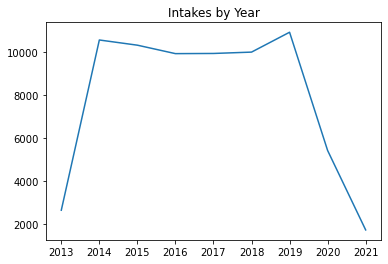

In [4]:
data = dogs['intake_year'].value_counts().reset_index().sort_values('index')

plt.plot(data['index'], data['intake_year'])
plt.title('Intakes by Year');

''

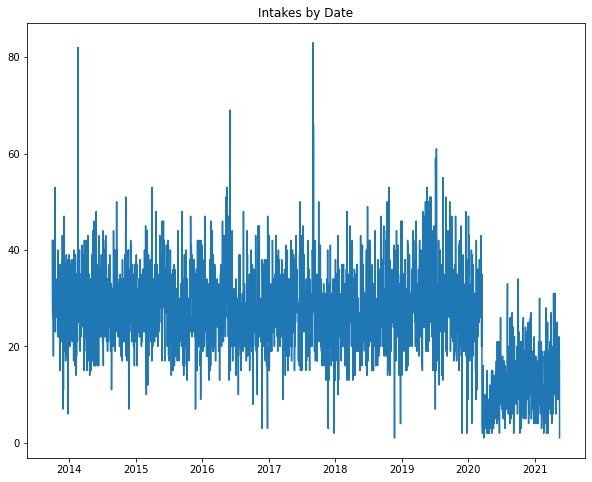

In [5]:
data = dogs.datetime.dt.date.value_counts().reset_index().sort_values('index')

plt.figure(figsize=(10,8))
plt.plot(data['index'], data['datetime'])
plt.title('Intakes by Date')
;

#### Intakes by Breed

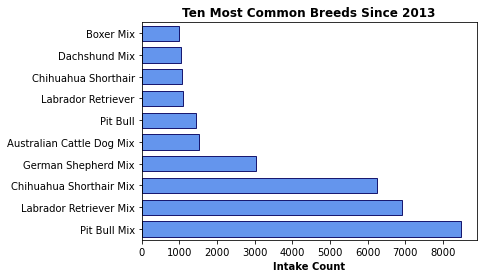

In [6]:
dogs.breed.value_counts().head(10).plot(kind='barh')

data = dogs['breed'].value_counts().reset_index().rename(columns={'index':'breed', 'breed':'count'}).head(10)

plt.barh(data['breed'], 
         data['count'],
         color='cornflowerblue',
         edgecolor='midnightblue',
         height=0.7
)

plt.title('Ten Most Common Breeds Since 2013', weight='bold')
plt.xlabel('Intake Count', weight='bold')

plt.savefig('../plots/ten_most_common_breeds_intake', dpi=300, bbox_inches='tight');

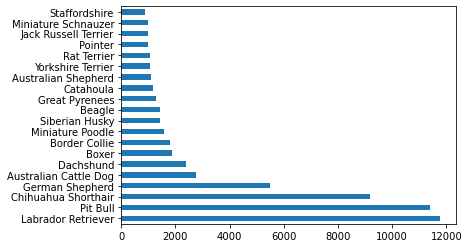

In [7]:
# Most common component of breed
pd.concat([dogs['breed_1'], dogs['breed_2']]).value_counts().head(20).plot(kind='barh')

In [8]:
dogs['mix_flag'].value_counts(normalize=True)

True     0.852067
False    0.147933
Name: mix_flag, dtype: float64

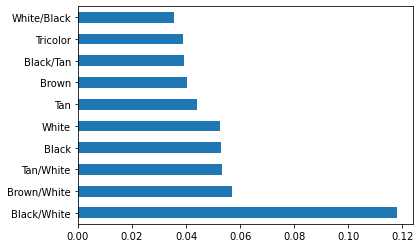

In [9]:
dogs['color'].value_counts(normalize=True).head(10).plot(kind='barh')

In [10]:
dogs['intake_type'].value_counts(normalize=True)

Stray                 0.695949
Owner Surrender       0.211698
Public Assist         0.087218
Abandoned             0.002589
Euthanasia Request    0.002547
Name: intake_type, dtype: float64

In [11]:
dogs['sex'].value_counts(normalize=True)

Male       0.535263
Female     0.458329
Unknown    0.006409
Name: sex, dtype: float64

In [12]:
dogs['spay_neuter'].value_counts(normalize=True)

Intact      0.629576
Neutered    0.199877
Spayed      0.164139
Unknown     0.006409
Name: spay_neuter, dtype: float64

In [13]:
dogs['intake_condition'].value_counts(normalize=True)

Normal      0.907157
Injured     0.043028
Sick        0.024152
Nursing     0.016652
Aged        0.005233
Other       0.001777
Medical     0.000812
Pregnant    0.000784
Behavior    0.000280
Feral       0.000126
Name: intake_condition, dtype: float64

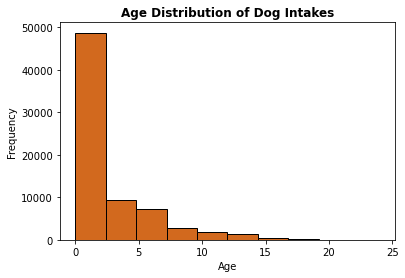

In [43]:
plt.hist(dogs['age_in_years'],
        color='chocolate',
        edgecolor='black')

plt.title('Age Distribution of Dog Intakes', weight='bold')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.savefig('../plots/age_distribution_intakes', bbox_inches='tight', dpi=300);

In [15]:
dogs['age_in_years'].describe()

count    71465.000000
mean         2.599073
std          3.012776
min          0.000000
25%          0.670000
50%          2.000000
75%          3.000000
max         24.000000
Name: age_in_years, dtype: float64

In [16]:
dogs['age_group'].value_counts(normalize=True)

between 1 and 3    0.375820
under 1            0.305590
over 5             0.189114
between 3 and 5    0.129476
Name: age_group, dtype: float64

In [17]:
dogs[['age_in_years', 'age_group']]

,age_in_years,age_group
0,2.00,between 1 and 3
1,8.00,over 5
2,0.92,under 1
4,4.00,between 3 and 5
5,2.00,between 1 and 3
...,...,...
126131,2.00,between 1 and 3
126132,0.17,under 1
126133,5.00,over 5
126140,3.00,between 3 and 5


In [19]:
dogs['found_city'].value_counts(normalize=True)

Austin                  0.800993
Travis                  0.106877
Manor                   0.026153
Del Valle               0.019688
Outside Jurisdiction    0.016679
Pflugerville            0.014762
Leander                 0.002491
Cedar Park              0.001581
Lago Vista              0.001371
Creedmoor               0.001273
Round Rock              0.001161
Jonestown               0.001021
Lakeway                 0.000966
Hays                    0.000924
Mustang Ridge           0.000910
Williamson              0.000854
Webberville             0.000602
Bastrop                 0.000504
Bee Cave                0.000476
West Lake Hills         0.000210
Sunset Valley           0.000168
Caldwell                0.000098
Point Venture           0.000084
Burnet                  0.000056
Rollingwood             0.000042
Blanco                  0.000028
Village Ot Hill         0.000014
San Leanna              0.000014
Name: found_city, dtype: float64